In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
# Setup
os.chdir("..")
plt.style.use("ggplot")

%matplotlib inline

In [19]:
def separator(x):
    return x**2

def which_cluster(x):
    if x[1] < separator(x[0]):
        return -1
    else:
        return 1

In [20]:
n_train = 50
X_train = np.random.uniform(size=(n_train, 2))

y_train = np.array([
    which_cluster(X_train[k, :]) for k in range(n_train)
], dtype=np.int8)

In [21]:
t = np.linspace(0, 1, 100)
sep = separator(t)

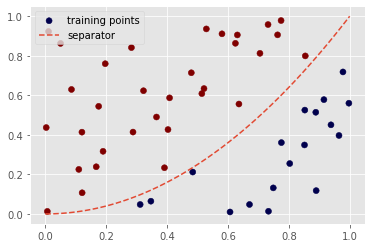

In [25]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='seismic', label="training points")
plt.plot(t, sep, '--', label='separator')
plt.legend()

In [26]:
from gp.models import GPBinaryClassifier
from gp.kernels import RBF
from gp.sigmoids import Logistic

In [27]:
ker = RBF(input_dim=2, l=)
